<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Datascience-assignments-1-to-5/blob/main/Logistic%20regression%20answer%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


In [43]:
path = r"/content/bank-full.csv"

In [44]:
data = pd.read_csv(path)

In [45]:
print(data)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [46]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [47]:
encoded_cols = pd.get_dummies(data[categorical_cols], drop_first=True)

In [48]:
data = data.drop(columns=categorical_cols)

In [49]:
data = pd.concat([data, encoded_cols], axis=1)

In [50]:
X = data.drop('y', axis=1)
y = data['y']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_test_binary = y_test.replace({'no': 0, 'yes': 1})

In [73]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [74]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [75]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.8987061815769103
Confusion Matrix:
[[7755  197]
 [ 719  372]]


In [70]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [71]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

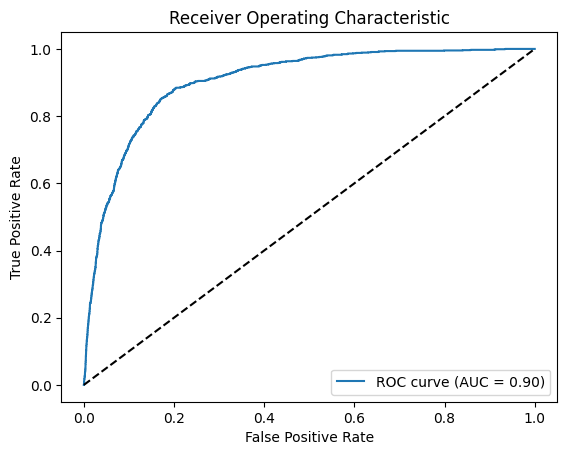

In [76]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob, pos_label=1)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()